## Part 1 - NN as Regressor

In [204]:
#%tensorflow_version 2.x
import tensorflow as tf
tf.__version__

'2.7.0'

In [205]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats 
import matplotlib.pyplot as plt
from tensorflow import keras
%matplotlib inline
#Test Train Split
from sklearn.model_selection import train_test_split
#Feature Scaling library
from sklearn.preprocessing import StandardScaler
import pickle
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras import regularizers, optimizers
from sklearn.metrics import r2_score
from tensorflow.keras.models import load_model

In [206]:
# Initialize the random number generator
import random
seed = 7
np.random.seed(seed)

# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

In [207]:
#Read the data as a data frame
mydata = pd.read_csv(r"Signal.xls")
mydata.head(20)

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [208]:
mydata['Signal_Strength'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [209]:
mydata.shape

(1599, 12)

In [210]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Parameter 1      1599 non-null   float64
 1   Parameter 2      1599 non-null   float64
 2   Parameter 3      1599 non-null   float64
 3   Parameter 4      1599 non-null   float64
 4   Parameter 5      1599 non-null   float64
 5   Parameter 6      1599 non-null   float64
 6   Parameter 7      1599 non-null   float64
 7   Parameter 8      1599 non-null   float64
 8   Parameter 9      1599 non-null   float64
 9   Parameter 10     1599 non-null   float64
 10  Parameter 11     1599 non-null   float64
 11  Signal_Strength  1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


All the parameter values are in float except the Signal strength

In [35]:
# Checking the presence of missing values
null_counts = mydata.isnull().sum()  # This prints the columns with the number of null values they have
print (null_counts)

Parameter 1        0
Parameter 2        0
Parameter 3        0
Parameter 4        0
Parameter 5        0
Parameter 6        0
Parameter 7        0
Parameter 8        0
Parameter 9        0
Parameter 10       0
Parameter 11       0
Signal_Strength    0
dtype: int64


In [36]:
# 5 point summary of numerical attributes
mydata.describe()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


> Parameter 3 ranges between 0 and 1.

> Maximum value of Parameter 5 is 0.6

> Parameter 8 has a very low range between 0.9 and 1.004 Standard deviation is lowest for Parameter 8, it is 0.001887

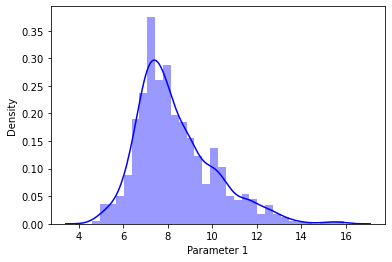

Distribution of  Parameter 1
Mean is: 8.319637273295838
Median is: 7.9
Mode is: 0    7.2
dtype: float64
Standard deviation is: 1.7410963181277006
Skewness is: 0.9827514413284587
Maximum is: 15.9
Minimum is: 4.6


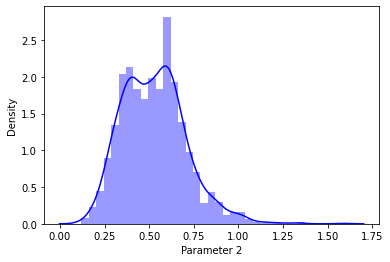

Distribution of  Parameter 2
Mean is: 0.5278205128205131
Median is: 0.52
Mode is: 0    0.6
dtype: float64
Standard deviation is: 0.17905970415353498
Skewness is: 0.6715925723840199
Maximum is: 1.58
Minimum is: 0.12


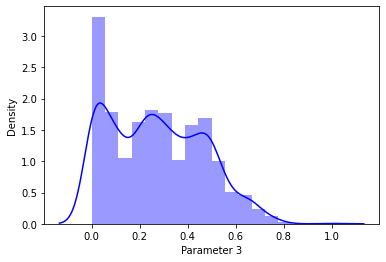

Distribution of  Parameter 3
Mean is: 0.2709756097560964
Median is: 0.26
Mode is: 0    0.0
dtype: float64
Standard deviation is: 0.19480113740531785
Skewness is: 0.3183372952546368
Maximum is: 1.0
Minimum is: 0.0


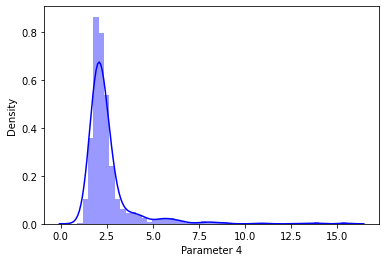

Distribution of  Parameter 4
Mean is: 2.5388055034396517
Median is: 2.2
Mode is: 0    2.0
dtype: float64
Standard deviation is: 1.4099280595072805
Skewness is: 4.54065542590319
Maximum is: 15.5
Minimum is: 0.9


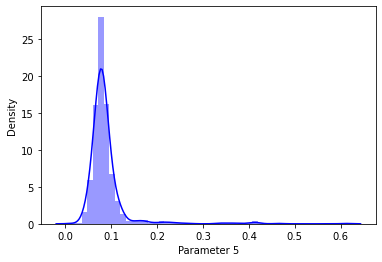

Distribution of  Parameter 5
Mean is: 0.08746654158849257
Median is: 0.079
Mode is: 0    0.08
dtype: float64
Standard deviation is: 0.047065302010090154
Skewness is: 5.680346571971724
Maximum is: 0.611
Minimum is: 0.012


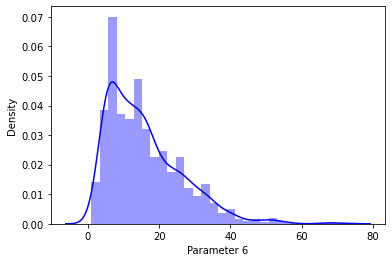

Distribution of  Parameter 6
Mean is: 15.874921826141339
Median is: 14.0
Mode is: 0    6.0
dtype: float64
Standard deviation is: 10.46015696980973
Skewness is: 1.250567293314441
Maximum is: 72.0
Minimum is: 1.0


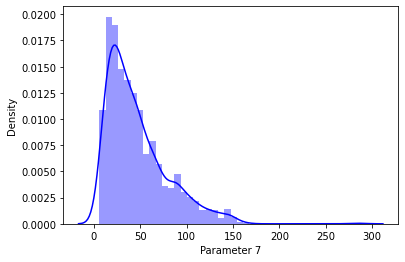

Distribution of  Parameter 7
Mean is: 46.46779237023139
Median is: 38.0
Mode is: 0    28.0
dtype: float64
Standard deviation is: 32.89532447829901
Skewness is: 1.515531257594554
Maximum is: 289.0
Minimum is: 6.0


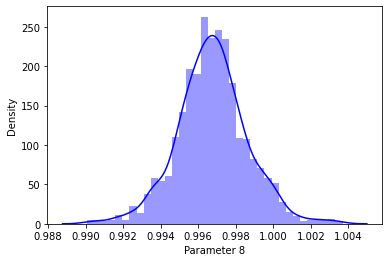

Distribution of  Parameter 8
Mean is: 0.9967466791744831
Median is: 0.99675
Mode is: 0    0.9972
dtype: float64
Standard deviation is: 0.0018873339538425559
Skewness is: 0.07128766294927483
Maximum is: 1.00369
Minimum is: 0.99007


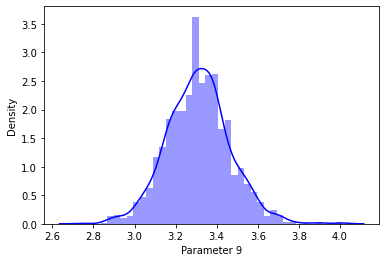

Distribution of  Parameter 9
Mean is: 3.311113195747343
Median is: 3.31
Mode is: 0    3.3
dtype: float64
Standard deviation is: 0.15438646490354266
Skewness is: 0.19368349811284427
Maximum is: 4.01
Minimum is: 2.74


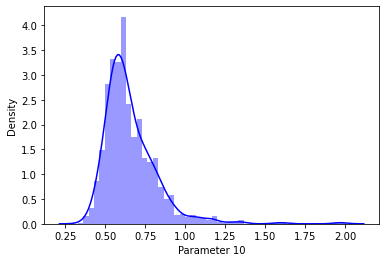

Distribution of  Parameter 10
Mean is: 0.6581488430268921
Median is: 0.62
Mode is: 0    0.6
dtype: float64
Standard deviation is: 0.16950697959010977
Skewness is: 2.4286723536602945
Maximum is: 2.0
Minimum is: 0.33


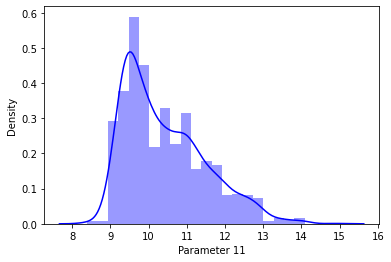

Distribution of  Parameter 11
Mean is: 10.422983114446502
Median is: 10.2
Mode is: 0    9.5
dtype: float64
Standard deviation is: 1.0656675818563965
Skewness is: 0.8608288069184189
Maximum is: 14.9
Minimum is: 8.4


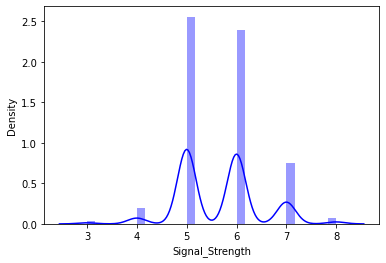

Distribution of  Signal_Strength
Mean is: 5.6360225140712945
Median is: 6.0
Mode is: 0    5
dtype: int64
Standard deviation is: 0.8075694397347023
Skewness is: 0.21780157547366327
Maximum is: 8
Minimum is: 3


In [211]:
# studying the distribution of continuous attributes
cols = list(mydata)
for i in np.arange(len(cols)):
    sns.distplot(mydata[cols[i]], color='blue')
    plt.show()
    print('Distribution of ',cols[i])
    print('Mean is:',mydata[cols[i]].mean())
    print('Median is:',mydata[cols[i]].median())
    print('Mode is:',mydata[cols[i]].mode())
    print('Standard deviation is:',mydata[cols[i]].std())
    print('Skewness is:',mydata[cols[i]].skew())
    print('Maximum is:',mydata[cols[i]].max())
    print('Minimum is:',mydata[cols[i]].min())

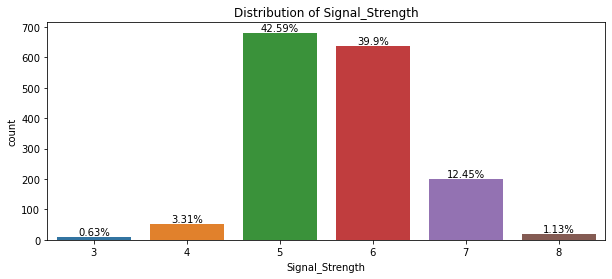

In [42]:


fig, ax = plt.subplots()
width = len(mydata['Signal_Strength'].unique()) + 4
fig.set_size_inches(width,4)
ax=sns.countplot(data = mydata, x= 'Signal_Strength') 
plt.title('Distribution of Signal_Strength')


for p in ax.patches: 
    ax.annotate(str((np.round(p.get_height()/len(mydata)*100,decimals=2)))+'%', (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

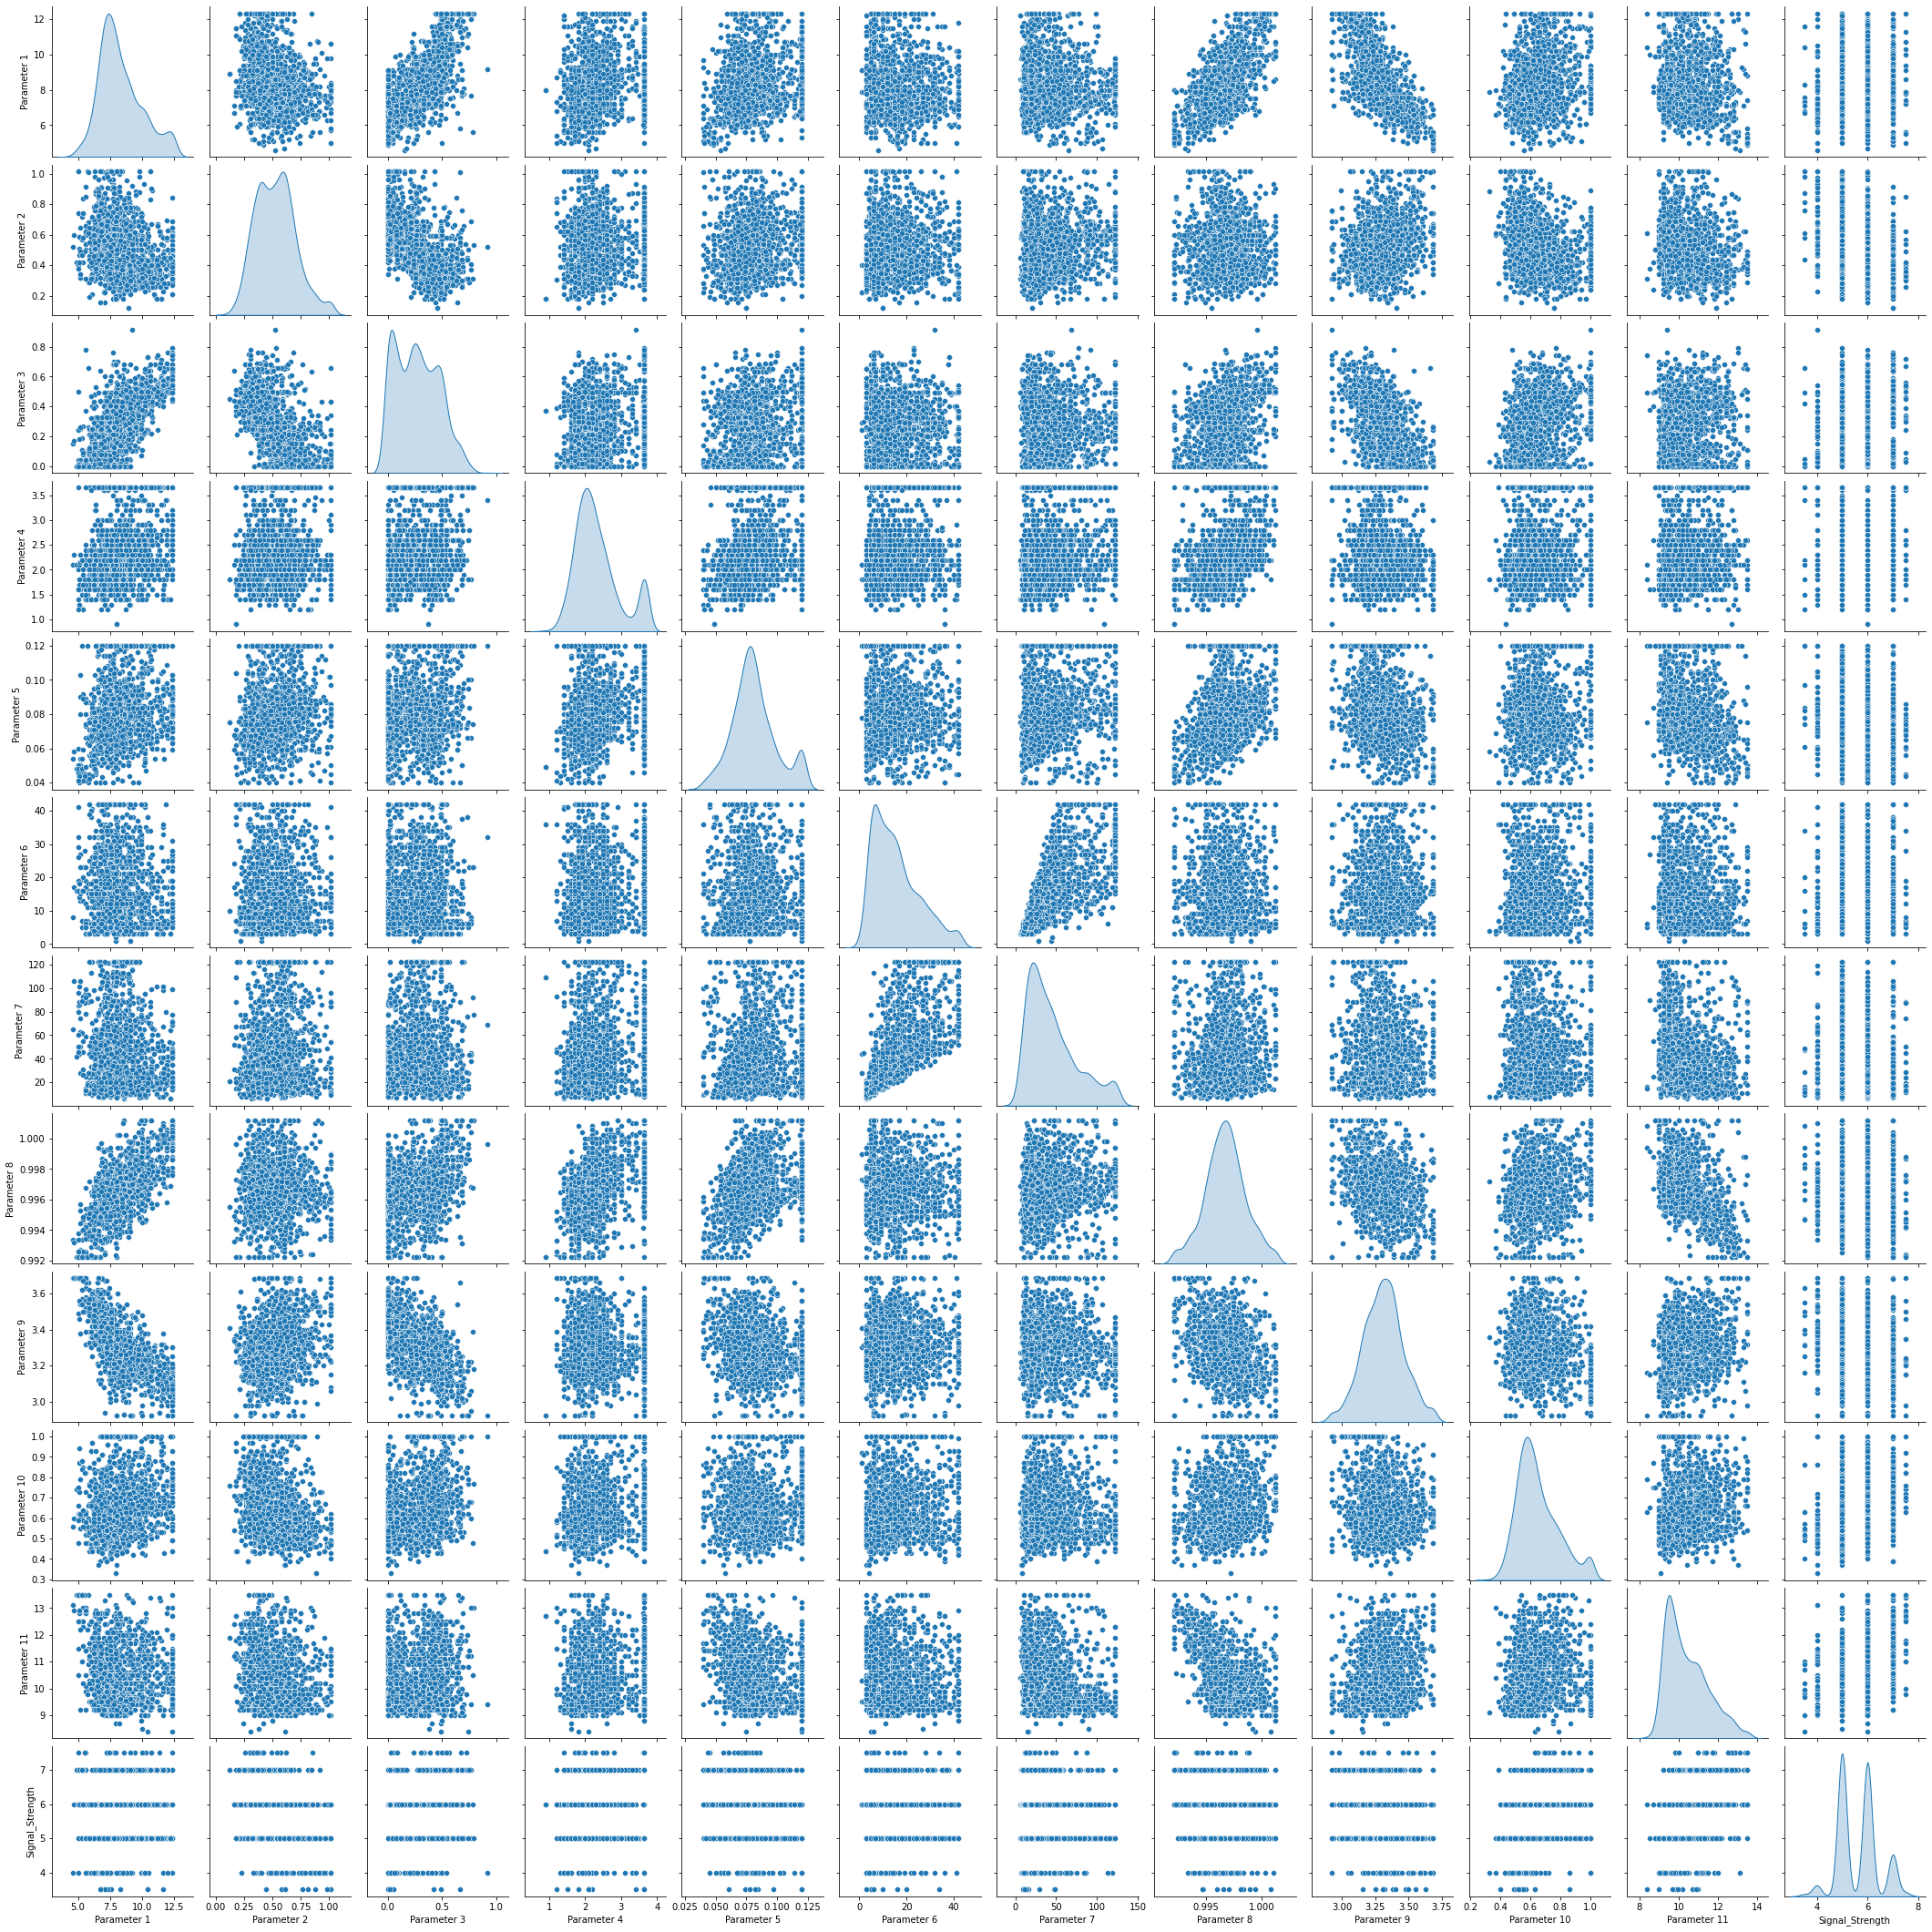

In [54]:
#plt.figure(figsize = (50,50))
sns.pairplot(mydata,diag_kind='kde')
plt.show()

1.Parameter 6 and Parameter 7 are highly correlated with each other and visce versa and they have almost 0 correlation with other Parameters

2.Parameter 1 is positively correlated to Parameter 3 and Parameter 8 and negatively correlated to Parameter 2 and Parameter 9. 

3.Parameter 4 is has very low correlation with other Parameters.

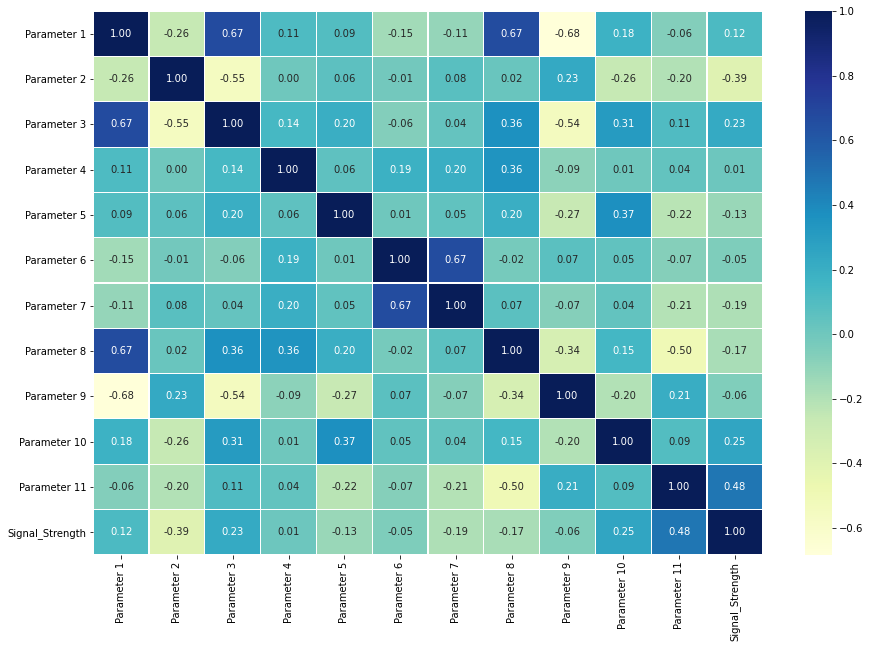

In [47]:
fig,ax = plt.subplots(figsize=(15, 10))   
sns.heatmap(mydata.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="YlGnBu") 
plt.show()

Since high correlation coefficient value lies between ± 0.50 and ± 1 Parameter 1 is highly correlated with Parameter 3 and Parameter 8, Parameter 9. Parameter 6 and 7 are highly correlated. But since, the correlation is not too high near 0.8 or above not dropping the features.

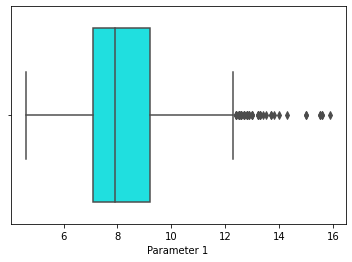

Boxplot of  Parameter 1
Q1 is :  7.1
Q2 is :  7.9
Q3 is :  9.2
IQR is: 2.0999999999999996
Lower Whisker, Upper Whisker :  3.95 , 12.349999999999998
Out of  1599  rows in data, number of outliers are: 49


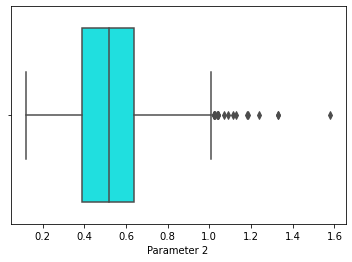

Boxplot of  Parameter 2
Q1 is :  0.39
Q2 is :  0.52
Q3 is :  0.64
IQR is: 0.25
Lower Whisker, Upper Whisker :  0.015000000000000013 , 1.0150000000000001
Out of  1599  rows in data, number of outliers are: 19


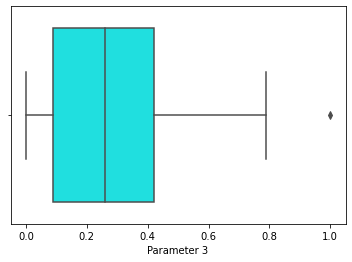

Boxplot of  Parameter 3
Q1 is :  0.09
Q2 is :  0.26
Q3 is :  0.42
IQR is: 0.32999999999999996
Lower Whisker, Upper Whisker :  -0.4049999999999999 , 0.9149999999999999
Out of  1599  rows in data, number of outliers are: 1


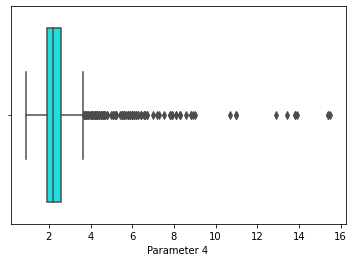

Boxplot of  Parameter 4
Q1 is :  1.9
Q2 is :  2.2
Q3 is :  2.6
IQR is: 0.7000000000000002
Lower Whisker, Upper Whisker :  0.8499999999999996 , 3.6500000000000004
Out of  1599  rows in data, number of outliers are: 155


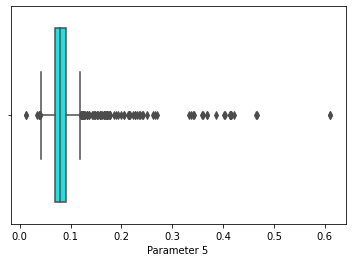

Boxplot of  Parameter 5
Q1 is :  0.07
Q2 is :  0.079
Q3 is :  0.09
IQR is: 0.01999999999999999
Lower Whisker, Upper Whisker :  0.04000000000000002 , 0.11999999999999998
Out of  1599  rows in data, number of outliers are: 112


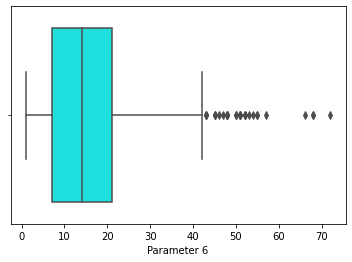

Boxplot of  Parameter 6
Q1 is :  7.0
Q2 is :  14.0
Q3 is :  21.0
IQR is: 14.0
Lower Whisker, Upper Whisker :  -14.0 , 42.0
Out of  1599  rows in data, number of outliers are: 30


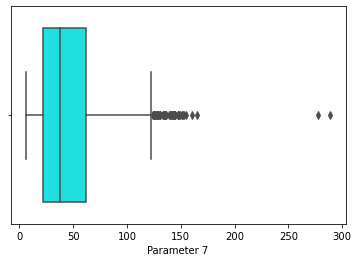

Boxplot of  Parameter 7
Q1 is :  22.0
Q2 is :  38.0
Q3 is :  62.0
IQR is: 40.0
Lower Whisker, Upper Whisker :  -38.0 , 122.0
Out of  1599  rows in data, number of outliers are: 55


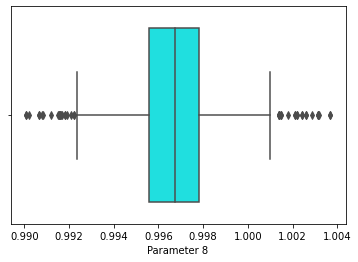

Boxplot of  Parameter 8
Q1 is :  0.9956
Q2 is :  0.99675
Q3 is :  0.997835
IQR is: 0.002234999999999987
Lower Whisker, Upper Whisker :  0.9922475000000001 , 1.0011875
Out of  1599  rows in data, number of outliers are: 45


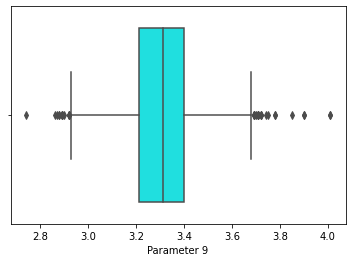

Boxplot of  Parameter 9
Q1 is :  3.21
Q2 is :  3.31
Q3 is :  3.4
IQR is: 0.18999999999999995
Lower Whisker, Upper Whisker :  2.925 , 3.6849999999999996
Out of  1599  rows in data, number of outliers are: 35


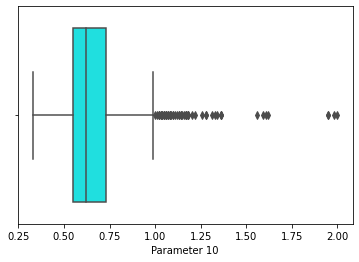

Boxplot of  Parameter 10
Q1 is :  0.55
Q2 is :  0.62
Q3 is :  0.73
IQR is: 0.17999999999999994
Lower Whisker, Upper Whisker :  0.28000000000000014 , 0.9999999999999999
Out of  1599  rows in data, number of outliers are: 59


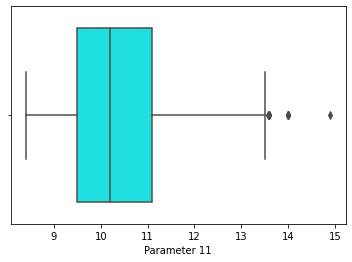

Boxplot of  Parameter 11
Q1 is :  9.5
Q2 is :  10.2
Q3 is :  11.1
IQR is: 1.5999999999999996
Lower Whisker, Upper Whisker :  7.1000000000000005 , 13.5
Out of  1599  rows in data, number of outliers are: 13


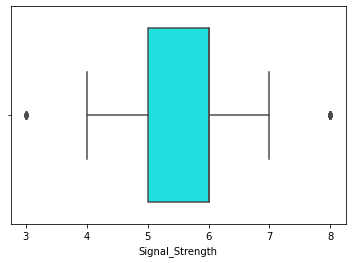

Boxplot of  Signal_Strength
Q1 is :  5.0
Q2 is :  6.0
Q3 is :  6.0
IQR is: 1.0
Lower Whisker, Upper Whisker :  3.5 , 7.5
Out of  1599  rows in data, number of outliers are: 28


In [212]:
# Checking the presence of outliers
l = len(mydata)
col = list(mydata.columns)
#col.remove('condition')
for i in np.arange(len(col)):
    sns.boxplot(x= mydata[col[i]], color='cyan')
    plt.show()
    print('Boxplot of ',col[i])
    #calculating the outiers in attribute 
    Q1 = mydata[col[i]].quantile(0.25)
    Q2 = mydata[col[i]].quantile(0.50)
    Q3 = mydata[col[i]].quantile(0.75) 
    IQR = Q3 - Q1
    L_W = (Q1 - 1.5 *IQR)
    U_W = (Q3 + 1.5 *IQR)    
    print('Q1 is : ',Q1)
    print('Q2 is : ',Q2)
    print('Q3 is : ',Q3)
    print('IQR is:',IQR)
    print('Lower Whisker, Upper Whisker : ',L_W,',',U_W)
    bools = (mydata[col[i]] < (Q1 - 1.5 *IQR)) |(mydata[col[i]] > (Q3 + 1.5 * IQR))
    print('Out of ',l,' rows in data, number of outliers are:',bools.sum())   #calculating the number of outliers

Parameter 4 has the highest number of outliers which is 155.

In [455]:
X = mydata.drop("Signal_Strength", axis=1)
y = mydata['Signal_Strength']

In [456]:
# splitting to create test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=seed)

In [457]:
print(X_train.shape)
print(X_test.shape)

(1119, 11)
(480, 11)


In [458]:
# splitting to create training and validation data
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=.20, random_state=seed)

In [459]:
from sklearn.preprocessing import StandardScaler

# Scaling training data
X_Train_S = StandardScaler().fit_transform(X_train)   

# Scaling testing data
X_Test_S = StandardScaler().fit_transform(X_test)     

In [460]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(895, 11)
(224, 11)
(480, 11)


In [461]:
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(895,)
(224,)
(480,)


In [462]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense,BatchNormalization, Dropout, LeakyReLU
from tensorflow.keras import optimizers

In [473]:
NN_model_Regressor = Sequential()

# The Input Layer :
NN_model_Regressor.add(Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model_Regressor.add(Dense(64, kernel_initializer='normal',activation='relu'))  # sigmoid, tanh

NN_model_Regressor.add(Dense(32, kernel_initializer='normal'))
NN_model_Regressor.add(LeakyReLU(alpha=0.1))

NN_model_Regressor.add(Dense(16, kernel_initializer='normal'))
NN_model_Regressor.add(LeakyReLU(alpha=0.1))


# The Output Layer :
NN_model_Regressor.add(Dense(1, kernel_initializer='normal'))  # except softmax
NN_model_Regressor.add(LeakyReLU(alpha=0.1))

# Compile the network :
NN_model_Regressor.compile(loss='mse', optimizer='adam',metrics=['accuracy'])
NN_model_Regressor.summary()

Model: "sequential_86"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_364 (Dense)            (None, 128)               1536      
_________________________________________________________________
dense_365 (Dense)            (None, 64)                8256      
_________________________________________________________________
dense_366 (Dense)            (None, 32)                2080      
_________________________________________________________________
leaky_re_lu_164 (LeakyReLU)  (None, 32)                0         
_________________________________________________________________
dense_367 (Dense)            (None, 16)                528       
_________________________________________________________________
leaky_re_lu_165 (LeakyReLU)  (None, 16)                0         
_________________________________________________________________
dense_368 (Dense)            (None, 1)               

In [474]:
EPOCH=500
Network_Regressor=NN_model_Regressor.fit(X_Train_S, y_train, validation_data=(X_Test_S,y_test), epochs=EPOCH, batch_size=200)

Epoch 1/500
5/5 [==============================] - 2s 120ms/step - loss: 32.4837 - accuracy: 0.0000e+00 - val_loss: 32.4086 - val_accuracy: 0.0000e+00
Epoch 2/500
5/5 [==============================] - 0s 22ms/step - loss: 32.3190 - accuracy: 0.0000e+00 - val_loss: 32.1814 - val_accuracy: 0.0000e+00
Epoch 3/500
5/5 [==============================] - 0s 18ms/step - loss: 32.0336 - accuracy: 0.0000e+00 - val_loss: 31.7573 - val_accuracy: 0.0000e+00
Epoch 4/500
5/5 [==============================] - 0s 15ms/step - loss: 31.4886 - accuracy: 0.0000e+00 - val_loss: 30.9303 - val_accuracy: 0.0000e+00
Epoch 5/500
5/5 [==============================] - 0s 16ms/step - loss: 30.4223 - accuracy: 0.0000e+00 - val_loss: 29.3253 - val_accuracy: 0.0000e+00
Epoch 6/500
5/5 [==============================] - 0s 16ms/step - loss: 28.4203 - accuracy: 0.0000e+00 - val_loss: 26.3561 - val_accuracy: 0.0000e+00
Epoch 7/500
5/5 [==============================] - 0s 17ms/step - loss: 24.7429 - accuracy: 0.0000e

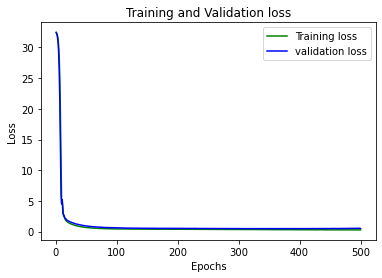

In [475]:
loss_train = Network_Regressor.history['loss']
loss_val = Network_Regressor.history['val_loss']
epochs = range(1,EPOCH+1)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [476]:
from tensorflow.keras.models import model_from_json


# Pickle model to JSON
Regressor_model_json = NN_model_Regressor.to_json()
with open("Regressor_model.json", "w") as json_file:
    json_file.write(Regressor_model_json)
# Pickle weights to HDF5
NN_model_Regressor.save_weights("Regressor_model.h5")
print("Saved model to disk")


# load json and create model
json_file = open('Regressor_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("Regressor_model.h5")
print("Loaded model from disk")

# Evaluate
loaded_model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
score = loaded_model.evaluate(X_Test_S,y_test, verbose=1)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Saved model to disk
Loaded model from disk
15/15 [==============================] - 1s 2ms/step - loss: 0.5024 - accuracy: 0.0000e+00
accuracy: 0.00%


# Part 2 - Autonomous Vehicles Project

In [403]:
# Seaborn is based on matplotlib, which aids in drawing attractive and informative statistical graphics.
import seaborn as sns
import tensorflow 
print(tensorflow.__version__)

2.7.0


In [404]:
# suppress display of warnings
warnings.filterwarnings('ignore')

# display all dataframe columns
pd.options.display.max_columns = None

# to set the limit to 3 decimals
pd.options.display.float_format = '{:.7f}'.format

# display all dataframe rows
pd.options.display.max_rows = None

## Read Data

In [405]:
import h5py

# Open the file as readonly
h5f = h5py.File('Part - 4 - Autonomous_Vehicles_SVHN_single_grey1.h5', 'r')

h5f.keys()

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

## Data Analysis and Preparation

In [406]:
# Load the training, test and validation set
X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
X_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]

In [407]:
#Let us see the contents of features and labels of one example from the images
X_train[:1] 

array([[[ 33.0704,  30.2601,  26.852 , ...,  71.4471,  58.2204,
          42.9939],
        [ 25.2283,  25.5533,  29.9765, ..., 113.0209, 103.3639,
          84.2949],
        [ 26.2775,  22.6137,  40.4763, ..., 113.3028, 121.775 ,
         115.4228],
        ...,
        [ 28.5502,  36.212 ,  45.0801, ...,  24.1359,  25.0927,
          26.0603],
        [ 38.4352,  26.4733,  23.2717, ...,  28.1094,  29.4683,
          30.0661],
        [ 50.2984,  26.0773,  24.0389, ...,  49.6682,  50.853 ,
          53.0377]]], dtype=float32)

In [408]:
y_train[:1]

array([2], dtype=uint8)

In [409]:
X_test[:1]

array([[[ 40.558 ,  46.7917,  48.9764, ..., 112.1153, 112.9904,
         112.1646],
        [ 39.4379,  44.2911,  47.1768, ..., 111.0122, 110.9475,
         109.9368],
        [ 38.4488,  43.6394,  48.7098, ..., 109.8921, 109.9414,
         109.1048],
        ...,
        [ 34.9869,  35.4707,  39.6676, ..., 109.211 , 109.9074,
         112.7346],
        [ 35.6602,  35.5462,  40.3193, ..., 110.9998, 112.049 ,
         114.3431],
        [ 36.1871,  35.4214,  40.6998, ..., 110.0169, 111.2017,
         114.1906]]], dtype=float32)

In [410]:
y_test[:1]

array([1], dtype=uint8)

## Visualize and Standardize the data

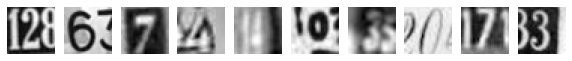

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [411]:
# visualizing the first 10 images in the dataset and their labels
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.axis('off')
plt.show()
print('label for each of the above image: %s' % (y_train[0:10]))

In [412]:
X_train.shape

(42000, 32, 32)

In [413]:
y_train.shape

(42000,)

Need to reshape the X_train and X_test so that the same can be fed for model building. We need to feed a 2D tensor into the model and currently we have a 3D tensor. 

- We will normalize the data. We divide by 255 as this is a grayscale image and can take values from 0-255


In [414]:
X_train = X_train.reshape(X_train.shape[0], 1024, 1)
X_test = X_test.reshape(X_test.shape[0], 1024, 1)

# # normalize inputs from 0-255 to 0-1
X_train = X_train / 255.0
X_test = X_test / 255.0

print('Resized Training set', X_train.shape, y_train.shape)
print('Resized Test set', X_test.shape, y_test.shape)

Resized Training set (42000, 1024, 1) (42000,)
Resized Test set (18000, 1024, 1) (18000,)


Encoding the target variables. We need to one hot encode the labels for the model to understand the labels better. We will be using categorical cross entropy as our loss function and for this purpose we need our labels to be in one hot encoded format.

In [415]:
from tensorflow.keras.utils import to_categorical
# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# no.of classes
num_classes = y_test.shape[1] 
print("The number of classes in this dataset are:",num_classes)

The number of classes in this dataset are: 10


## Model building


In [416]:
# define model

from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

def nn_model():
    # create model
    model = Sequential()  
    model.add(Flatten())
    model.add(Dense(256, activation='relu')) ###Multiple Dense units with Relu activation
    model.add(Dense(64, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    return model

In [417]:
# build the model
model = nn_model()

In [418]:
# Compile model
sgd = optimizers.Adam(lr=1e-3)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy']) ### Loss function = Categorical cross entropy

In [419]:
# Fit the model
training_history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, batch_size=300, verbose=2)

Epoch 1/200
140/140 - 2s - loss: 2.3023 - accuracy: 0.1104 - val_loss: 2.2763 - val_accuracy: 0.1602
Epoch 2/200
140/140 - 1s - loss: 2.1142 - accuracy: 0.2288 - val_loss: 1.9043 - val_accuracy: 0.3217
Epoch 3/200
140/140 - 1s - loss: 1.7991 - accuracy: 0.3743 - val_loss: 1.6100 - val_accuracy: 0.4541
Epoch 4/200
140/140 - 1s - loss: 1.5231 - accuracy: 0.4901 - val_loss: 1.4489 - val_accuracy: 0.5077
Epoch 5/200
140/140 - 1s - loss: 1.3782 - accuracy: 0.5453 - val_loss: 1.3027 - val_accuracy: 0.5718
Epoch 6/200
140/140 - 1s - loss: 1.3049 - accuracy: 0.5741 - val_loss: 1.2819 - val_accuracy: 0.5788
Epoch 7/200
140/140 - 1s - loss: 1.2354 - accuracy: 0.6001 - val_loss: 1.2186 - val_accuracy: 0.6030
Epoch 8/200
140/140 - 1s - loss: 1.2025 - accuracy: 0.6098 - val_loss: 1.1725 - val_accuracy: 0.6238
Epoch 9/200
140/140 - 1s - loss: 1.1371 - accuracy: 0.6385 - val_loss: 1.1106 - val_accuracy: 0.6502
Epoch 10/200
140/140 - 1s - loss: 1.0831 - accuracy: 0.6580 - val_loss: 1.0579 - val_accura

# Conclusion and Interpretation


In [420]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=1)
print("Loss:", scores[0])
print("Accuracy:", scores[1])

563/563 [==============================] - 1s 1ms/step - loss: 0.7896 - accuracy: 0.8078
Loss: 0.7895674109458923
Accuracy: 0.8077777624130249


Text(0.5, 1.0, 'Training and validation loss')

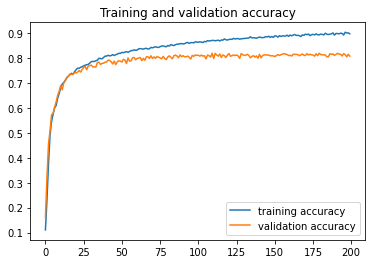

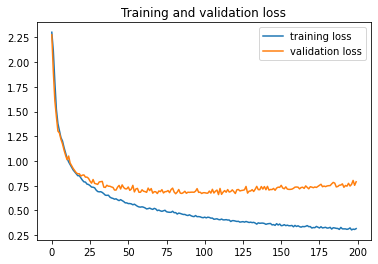

In [421]:
accuracy      = training_history.history['accuracy']
val_accuracy  = training_history.history['val_accuracy']
loss     = training_history.history['loss']
val_loss = training_history.history['val_loss']

epochs   = range(len(accuracy)) # Get number of epochs

plt.plot  ( epochs, accuracy, label = 'training accuracy' )
plt.plot  ( epochs, val_accuracy, label = 'validation accuracy' )
plt.title ('Training and validation accuracy')
plt.legend(loc = 'lower right')
plt.figure()

plt.plot  ( epochs, loss, label = 'training loss' )
plt.plot  ( epochs, val_loss, label = 'validation loss' )
plt.legend(loc = 'upper right')
plt.title ('Training and validation loss'   )

In [425]:
print('Trianing accuracy',max(accuracy))
print('Validation accuracy',max(val_accuracy))

Trianing accuracy 0.9037142992019653
Validation accuracy 0.8195000290870667


There are around 10 classes in the dataset which represent digits from 0-9.

We tried training a Neural Network with dense hidden layers of different number of units and are able to achieve a final test accuracy of 80.77 %. 

Also we notice that after a certain point the model begins to overfit on our dataset as is clear from the plots above where the validation loss begins to increase after certain point and validation accuracy begins to decrease.

Thus, with this amount of accuracy we are able to distinguish between the different digits in this dataset.
